In [57]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D
from keras.datasets import mnist
from keras.utils import np_utils
from keras.layers import Dense, Dropout, Activation, Flatten

In [1]:
%matplotlib inline

In [74]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [69]:
print X_train.shape

(60000, 1, 28, 28)


In [9]:
from matplotlib import pyplot as plt

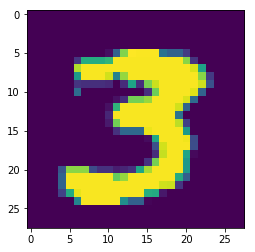

In [27]:
plt.imshow(X_train[27])

In [76]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [75]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [34]:
print y_train[11], Y_train[11]

5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [71]:
print X_train.shape

(60000, 1, 28, 28)


In [77]:
model = Sequential()
# CNN input layer
# 32=number of convolution filters to use, 3,3=(rows, columns) in each convolution kernel
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
print model.output_shape
model.add(Conv2D(32, (3, 3), activation='relu'))
print model.output_shape
# Pooling=collapsing the activation area to a single value
# MaxPool = Max value in the activation area
model.add(MaxPool2D(pool_size=(2,2)))
print model.output_shape

(None, 26, 26, 32)
(None, 24, 24, 32)
(None, 12, 12, 32)


In [78]:
print model.output_shape

(None, 12, 12, 32)


In [79]:
model.add(Flatten())
# Dense: synonym for fully-connected layer
model.add(Dense(128, activation='relu'))
# dropput=form of regularization; avoids overfitting
model.add(Dropout(0.5))
#10= #classes for output
model.add(Dense(10, activation='softmax'))

In [81]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [82]:
model.fit(X_train, Y_train, 
          batch_size=32, nb_epoch=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 56s 927us/step - loss: 0.1480 - acc: 0.9577
Epoch 2/10
60000/60000 [==============================] - 57s 948us/step - loss: 0.0925 - acc: 0.9725
Epoch 3/10
60000/60000 [==============================] - 57s 950us/step - loss: 0.0758 - acc: 0.9776
Epoch 4/10
60000/60000 [==============================] - 56s 938us/step - loss: 0.0641 - acc: 0.9810
Epoch 5/10
60000/60000 [==============================] - 59s 980us/step - loss: 0.0553 - acc: 0.9827
Epoch 6/10
60000/60000 [==============================] - 59s 987us/step - loss: 0.0510 - acc: 0.9849
Epoch 7/10
60000/60000 [==============================] - 58s 966us/step - loss: 0.0464 - acc: 0.9864
Epoch 8/10
60000/60000 [==============================] - 58s 967us/step - loss: 0.0430 - acc: 0.9862
Epoch 9/10
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0397 - acc: 0.9880
Epoch 10/10
60000/60000 [==============================] - 62s 1ms/step - loss: 0.03

In [83]:
# 10. Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=0)

In [84]:
print score

[0.04797183532658964, 0.9869]


In [89]:
y_pred = model.predict_classes(X_test)
print y_pred[:20]

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 5 4]


In [90]:
print y_test[:20]

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
